<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n20.csv',
 'data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n60.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.506329,-4.448915,29.057414,31.546642,-2.489228
1,0.0,1.0,68.936281,-2.263599,76.672682,79.784439,-3.111757
2,0.0,2.0,81.520060,1.293022,92.813082,93.145970,-0.332889
3,0.0,3.0,95.838550,10.529802,116.368352,108.349430,8.018922
4,0.0,4.0,69.652187,9.851395,89.503582,80.544592,8.958990
...,...,...,...,...,...,...,...
19995,999.0,15.0,44.047216,1.681595,55.728812,54.464216,1.264596
19996,999.0,16.0,93.808751,-6.460057,97.348694,103.346229,-5.997535
19997,999.0,17.0,32.507166,6.042247,48.549413,43.128133,5.421280
19998,999.0,18.0,40.398902,-3.922729,46.476174,50.880385,-4.404211


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.506329,-4.448915,29.057414,31.546642,-2.489228
1,0.0,1.0,68.936281,-2.263599,76.672682,79.784439,-3.111757
2,0.0,2.0,81.520060,1.293022,92.813082,93.145970,-0.332889
3,0.0,3.0,95.838550,10.529802,116.368352,108.349430,8.018922
4,0.0,4.0,69.652187,9.851395,89.503582,80.544592,8.958990
...,...,...,...,...,...,...,...
19995,999.0,15.0,44.047216,1.681595,55.728812,54.464216,1.264596
19996,999.0,16.0,93.808751,-6.460057,97.348694,103.346229,-5.997535
19997,999.0,17.0,32.507166,6.042247,48.549413,43.128133,5.421280
19998,999.0,18.0,40.398902,-3.922729,46.476174,50.880385,-4.404211


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat     e_hat
rep   index                                                        
0.0   0.0    23.506329  -4.448915   29.057414   31.546642 -2.489228
      1.0    68.936281  -2.263599   76.672682   79.784439 -3.111757
      2.0    81.520060   1.293022   92.813082   93.145970 -0.332889
      3.0    95.838550  10.529802  116.368352  108.349430  8.018922
      4.0    69.652187   9.851395   89.503582   80.544592  8.958990
...                ...        ...         ...         ...       ...
999.0 15.0   44.047216   1.681595   55.728812   54.464216  1.264596
      16.0   93.808751  -6.460057   97.348694  103.346229 -5.997535
      17.0   32.507166   6.042247   48.549413   43.128133  5.421280
      18.0   40.398902  -3.922729   46.476174   50.880385 -4.404211
      19.0   35.721565  -4.425009   41.296556   46.285719 -4.989162

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat     e_hat
rep   index                                                        
0.0   0.0    23.506329  -4.448915   29.057414   31.546642 -2.489228
      1.0    68.936281  -2.263599   76.672682   79.784439 -3.111757
      2.0    81.520060   1.293022   92.813082   93.145970 -0.332889
      3.0    95.838550  10.529802  116.368352  108.349430  8.018922
      4.0    69.652187   9.851395   89.503582   80.544592  8.958990
...                ...        ...         ...         ...       ...
999.0 15.0   44.047216   1.681595   55.728812   54.464216  1.264596
      16.0   93.808751  -6.460057   97.348694  103.346229 -5.997535
      17.0   32.507166   6.042247   48.549413   43.128133  5.421280
      18.0   40.398902  -3.922729   46.476174   50.880385 -4.404211
      19.0   35.721565  -4.425009   41.296556   46.285719 -4.989162

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.506329,-4.448915,29.057414,31.546642,-2.489228
1,0.0,1.0,68.936281,-2.263599,76.672682,79.784439,-3.111757
2,0.0,2.0,81.520060,1.293022,92.813082,93.145970,-0.332889
3,0.0,3.0,95.838550,10.529802,116.368352,108.349430,8.018922
4,0.0,4.0,69.652187,9.851395,89.503582,80.544592,8.958990
...,...,...,...,...,...,...,...
19995,999.0,15.0,44.047216,1.681595,55.728812,54.464216,1.264596
19996,999.0,16.0,93.808751,-6.460057,97.348694,103.346229,-5.997535
19997,999.0,17.0,32.507166,6.042247,48.549413,43.128133,5.421280
19998,999.0,18.0,40.398902,-3.922729,46.476174,50.880385,-4.404211


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat     e_hat
rep   index                                                        
0.0   0.0    23.506329  -4.448915   29.057414   31.546642 -2.489228
      1.0    68.936281  -2.263599   76.672682   79.784439 -3.111757
      2.0    81.520060   1.293022   92.813082   93.145970 -0.332889
      3.0    95.838550  10.529802  116.368352  108.349430  8.018922
      4.0    69.652187   9.851395   89.503582   80.544592  8.958990
...                ...        ...         ...         ...       ...
999.0 15.0   44.047216   1.681595   55.728812   54.464216  1.264596
      16.0   93.808751  -6.460057   97.348694  103.346229 -5.997535
      17.0   32.507166   6.042247   48.549413   43.128133  5.421280
      18.0   40.398902  -3.922729   46.476174   50.880385 -4.404211
      19.0   35.721565  -4.425009   41.296556   46.285719 -4.989162

[20000 rows x 5 columns]

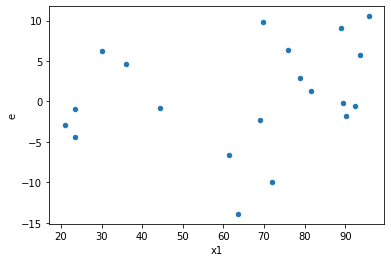

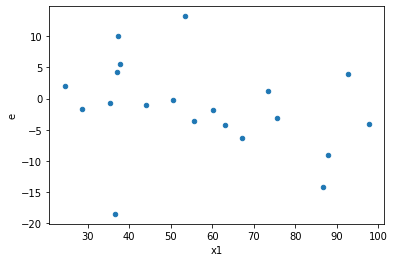

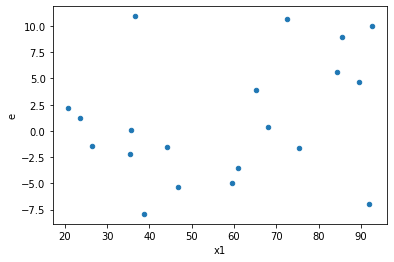

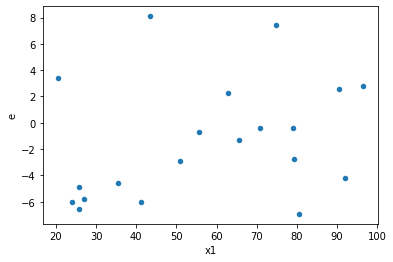

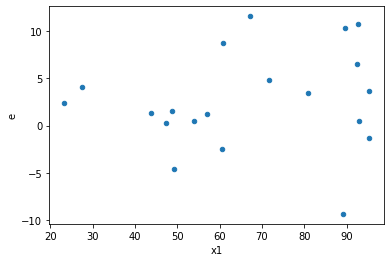

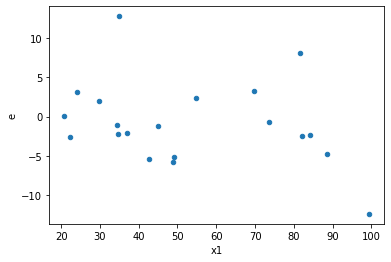

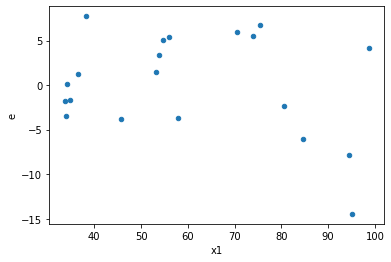

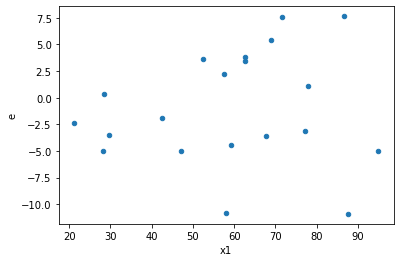

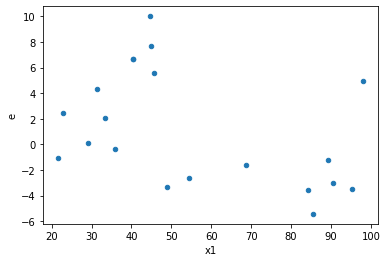

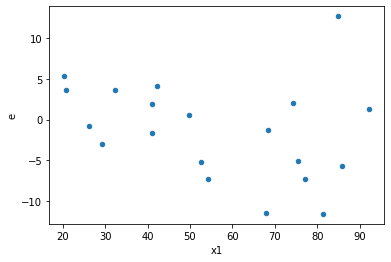

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,7.0,7.0,190.32522345889257,272.99225974798816,27.18931763698465,38.99889424971259,1.4343461932514188,0.6460226018870001,0.6769886990564999,0.32301130094350006,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,31.98819633002092,305.8114778236301,4.569742332860131,43.6873539748043,9.560135078220277,0.008044556279597437,0.9959777218602013,0.004022278139798718,Reject001=0 : Heteroscedasticity
6.0,7.0,7.0,94.58052347635801,266.79538260313234,13.51150335376543,38.113626086161766,2.8208279336688418,0.19464787466837397,0.902676062665813,0.09732393733418698,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,52.12655484345028,265.0680350505604,7.446650691921469,37.86686215008006,5.085086398796722,0.047713329732369525,0.9761433351338152,0.023856664866184762,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,36.6365452737676,62.39538971283097,5.2337921819668,8.913627101832995,1.7030915236843345,0.4990879547191547,0.7504560226404227,0.24954397735957734,Reject001=1 : Homoscedasticity
9.0,7.0,7.0,63.321400313558875,375.89875410332917,9.045914330508412,53.69982201476131,5.936361992026868,0.03153050936584245,0.9842347453170788,0.015765254682921226,Reject001=1 : Homoscedasticity
11.0,7.0,7.0,67.24561351399146,106.71154029102311,9.606516216284493,15.244505755860445,1.5868922107286623,0.5571886620538635,0.7214056689730682,0.27859433102693176,Reject001=1 : Homoscedasticity
12.0,7.0,7.0,150.9780746692753,207.44651922295145,21.56829638132504,29.635217031850207,1.3740175166319546,0.6856140664040151,0.6571929667979924,0.34280703320200756,Reject001=1 : Homoscedasticity
13.0,7.0,7.0,68.08295450071809,88.52353300243408,9.72613635724544,12.646219000347726,1.3002304857598448,0.737848905530841,0.6310755472345795,0.3689244527654205,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,183.9627891281169,134.91400286785594,26.280398446873843,19.273428981122276,0.7333765894030776,0.6927584961937081,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,498.8158894601342,225.69633496371617,71.25941278001918,32.242333566245165,0.45246420519600145,0.31726984752417303,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,190.32522345889257,272.99225974798816,27.18931763698465,38.99889424971259,1.4343461932514188,0.6460226018870001,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,191.2382587993132,142.64767649465608,27.319751257044743,20.37823949923658,0.7459159970931944,0.7087105048412475,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,31.98819633002092,305.8114778236301,4.569742332860131,43.6873539748043,9.560135078220277,0.008044556279597437,Reject001=0 : Heteroscedasticity
5.0,7.0,7.0,176.11810740556186,146.8577209660326,25.15972962936598,20.97967442371894,0.8338592955002125,0.8166966033284917,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,94.58052347635801,266.79538260313234,13.51150335376543,38.113626086161766,2.8208279336688418,0.19464787466837397,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,52.12655484345028,265.0680350505604,7.446650691921469,37.86686215008006,5.085086398796722,0.047713329732369525,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,36.6365452737676,62.39538971283097,5.2337921819668,8.913627101832995,1.7030915236843345,0.4990879547191547,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      963
Reject001=0 : Heteroscedasticity     37
Name: Result_test, dtype: int64